<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h2><strong>Programming Assignment 5 :- Generative Models</strong></h2>
<h4><strong> Jyoti Sinha</strong></h4>

In [ ]:
!pip install tensorflow==1.14

<h1>Restricted Boltzmann Machine</h1>

RBMs are a two-layered artificial neural network having generative capabilities. They have the potential to learn a probability distribution over its set of input. It can be used for dimensionality reduction, classification, regression, collaborative filtering, feature learning, and topic modeling.They are a special class of Boltzmann Machines and they are restricted in terms of the connections between the visible and the hidden units. RBMs are a two-layered neural network (one being the visible layer and the other one being the hidden layer) and these two layers forms a fully bipartite graph. This suggests that each and every node in the visible layer is connected to every node in the hidden layer but no two nodes in the same group are connected to each other. This restriction allows for more efficient training algorithms.
Explaination of RBM implementation:-
 Let the training set be x and in order to train an RBM, we need to maximize the product of probabilities that is assigned to the training set V.
 This can be written as:-
 $$argmax_w \Pi_xP(x)$$
 or we can maximize the expected log probability of x.

 $$argmax_wE[ \sum_xlogP(x)]$$
 We can define the objective function as the average negative log-likelihood. And we try to minimize it.We can get this by the partial derivative of this function with respect to all of its parameters.Basically, minimizing the objective function means modifying the weight vector W.Thus, I  used stochastic gradient descent to find the optimal weight  to minimize the objective function. On deriving, we get two terms, termed as positive and negative gradient.These reflect their effect on the probability density defined by the model.

The positive phase increases the probability of the training data and the negative phase decrease the probability of samples generated by the model.Since, the negative phase is very difficult to compute. So, we use Contrastive Divergence(CD) During the calculation of CD, we use Gibbs sampling to sample from our model distribution.
Contrastive Divergence is basically a matrix of values and computed and used used to modify the values of W matrix On each epoch, W is getted updated by a new value of w.
Thus, the equation can be written as,
$${W'} = W +alpha+ CD$$
where, CD is the Learning rate
I calculated CD as folloes:-
Let take a training sample from X and then compute the probabilities of the  hidden units and sampled the hidden activation vector h from the probability distribution.
Thus, $$h_(prime)= sigmoid(X*W + hb)
                = sampleprob(h_(prime))$$
On computing the outer product of X and h_prime  we get positive gradient.
$$w_(positivegrad)= X* h_(prime)$$ and this is the reconstruction phase.
From h, we sample reconstruction v_prime of the visible unit then resample the hidden activations.
$$v_(prime)= sigmoid((h_prime) * transpose(w)+visible bias)
           = sample_(prob)(v_(prime))$$
On computing the outer products of above we get the negative gradient and is given by,
$$w_(negativegrad)= v_(prime)* (h_(prime))$$
And, we know that CD = positive gradient- negative gradient and is matrix.
Thus, the equation of CD is given by,
$$ CD= (w_(positivegrad)- w_(negativegrad))/datapoints$$
On uodating the weights, we get
$${W'}= W + alpha + CD$$







In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
#Reading dataset
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
#Defining training and testing dataset
X_train = mnist.train.images
y_train =  mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels 

In [ ]:
#Defining the terms:-
datapoints=16
hidden_units= [20,100,500]  
for hidden_units in hidden_units:
  mb_size=16
  W = np.random.randn(mnist.train.images.shape[1], hidden_units) * 0.001
  hidden= np.random.randn(hidden_units) * 0.001
  visible = np.random.randn(mnist.train.images.shape[1]) * 0.001

In [ ]:
#Defining sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

Data Input Phase 

In [ ]:
#Input phase
def input_phase(x):
    return sigmoid(np.matmul(x, W))

Data Recontruction Phase

In [ ]:
#Reconstruction phase
def reconstruction_phase(H):
    return sigmoid(np.matmul(H,(W.T))) 

In [ ]:
alpha=0.1
K = 10
for t in range(1, 1001):
    size= (mnist.train.next_batch(datapoints)[0] > 0.5).astype(np.float)
    CD = 0
    CD_h = 0
    CD_v = 0

    for v in size:
        h = input_phase(v)
        v1 = np.copy(v)

        for k in range(K):
            v1 = np.random.binomial(n=1, p=reconstruction_phase(h1))
            h1 = np.random.binomial(n=1, p=input_phase(v1))
        
        h1 = input_phase(v1)
        new_W = np.outer(v, h) - np.outer(v1, h1)
        new_hidden = h - h1
        new_visible = v - v1

        
        CD = (new_W + CD)/datapoints
        CD_h = (new_hidden + CD_h)/datapoints
        CD_v = (new_visible + CD_v)/datapoints
 
    W = W + alpha * CD
    hidden = hidden + alpha * CD_h
    visible = visible + alpha * CD_v

In [ ]:
#Define plot:-
def plot(samples, size, name):
    size = int(size)
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.imshow(sample.reshape(size, size), cmap='nipy_spectral') 
        plt.show()
    plt.close(fig)

In [ ]:
#Define model:-
def testModel():
    X = (mnist.test.next_batch(mb_size)[0] > 0.5).astype(np.float)
    H = np.random.binomial(n=1, p=input_phase(X))
    X_recon = (reconstruction_phase(H) > 0.5).astype(np.float)
    plot(X_recon, np.sqrt(mnist.train.images.shape[1]), 'V')

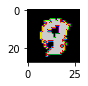

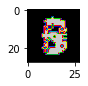

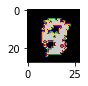

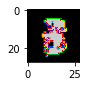

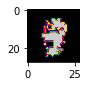

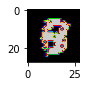

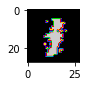

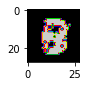

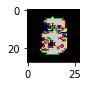

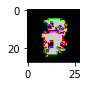

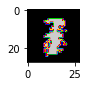

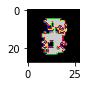

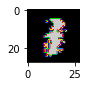

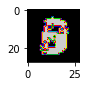

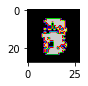

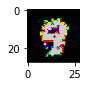

In [ ]:
testModel()

<h3> Reference</h3>

1)https://rubikscode.net/2018/10/22/implementing-restricted-boltzmann-machine-with-python-and-tensorflow/

2)http://deeplearning.net/tutorial/rbm.html

3)https://www.youtube.com/watch?v=jlwUqksvnRs&list=PL-XeOa5hMEYxNzHM7YLRjIwE1k3VQpqEh&index=22

4)https://pathmind.com/wiki/restricted-boltzmann-machine